# Takens embedding 
In this notebook we verify numerically the statement of Takens embedding theorem from dynamical systems which states that it is a generic propriety for a vector field $f$ and observation function $h$ that the delay map given by
$$ \Phi_{h, f} (x) = (h(x), h(\varphi_\tau(x)), \dots, h(\varphi_{(n - 1)\tau}(x)))$$ is an embedding for the appropriate choice of delay parameter $\tau$ and dimension $n$. Here $\varphi_t(x)$ denotes the flow of the ODE $\dot{x} = f(x)$ with initial condition $x$.

We verify this result for Lorentz's system
$$ \begin{cases}
\dot{x} = \sigma (y - x)\\
\dot{y} = x(\rho - z) - y\\
\dot{z} = xy - \beta z
\end{cases}$$

First define the lorenz equations of motion

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def lorenz(D, *, s=10, r=28, b=2.667):
    x, y, z = D
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return np.array([x_dot, y_dot, z_dot]).T



Plot the trajectory starting at (1, 1, 1) for a time of $dt*steps = 1000$

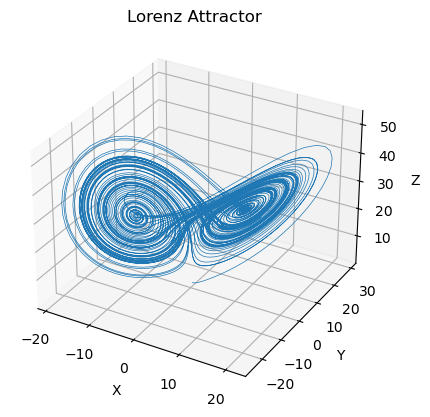

In [88]:
initial_state = [1.0, 1.0, 1.0]
dt = 0.01
steps = 10000

traj = np.empty((steps + 1, 3))  
traj[0] = (0., 1., 1.05)  

# simple forward euler method
for i in range(steps):
    traj[i + 1] = traj[i] + lorenz(traj[i]) * dt

x = traj[:, 0];
y = traj[:, 1];
z = traj[:, 2];
# Plot the vector field
ax = plt.figure().add_subplot(projection='3d')
ax.plot(x, y, z, linewidth=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Lorenz Attractor')
plt.show()


Now plot the lorenz vector field to get a sense of where the trajectory comes from

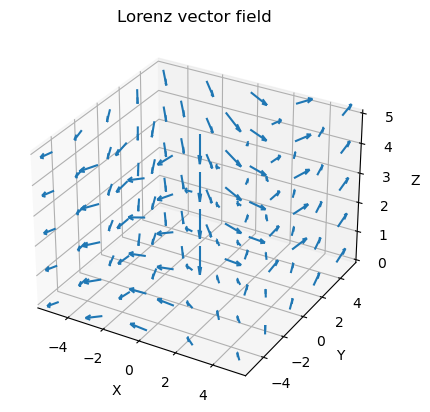

In [89]:
xx = np.linspace(-5, 5, 5)
yy = np.linspace(-5, 5, 5)
zz = np.linspace(0, 5, 5)
X, Y, Z = np.meshgrid(xx, yy, zz)

sigma = 10
rho=28
beta =2.667
U = sigma*(Y - X)
V = rho*X - Y - np.multiply(X,Z)
W = np.multiply(X,Y) - beta*Z

ax = plt.figure().add_subplot(projection='3d')

# Plot the vector field

ax.quiver(X, Y, Z, U, V, W, length=1, normalize=True)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Lorenz vector field')
plt.show()

Let the observation function $h(x, y, z) = x$ be the projection onto the first component. Below we plot its time series. We extracted <tt> x</tt> form <tt>traj</tt> two cells above

Text(0, 0.5, 'x(t)')

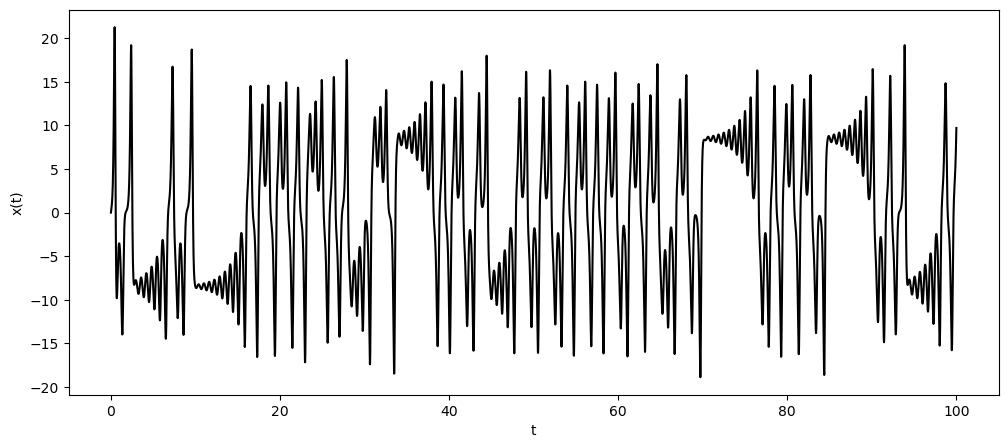

In [90]:
plt.figure(figsize=(12,5))
plt.plot(np.linspace(0, dt*steps, steps+1), x, 'k')
plt.xlabel('t')
plt.ylabel('x(t)')

Set the delay, and plot the delay embedding map 

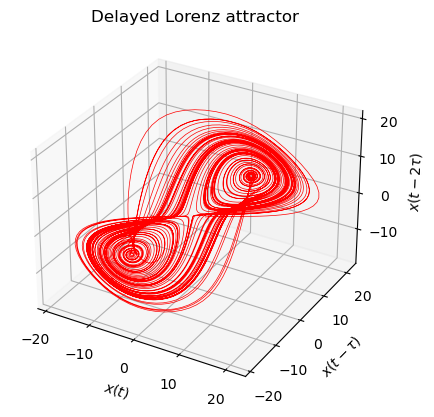

In [93]:
tau = 10

ax = plt.figure().add_subplot(projection='3d')
ax.plot( x[2*tau: ], x[tau:  - tau],x[0:  - 2*tau],'r', linewidth=0.5)
ax.set_xlabel(r'$x(t)$')
ax.set_ylabel(r'$x(t - \tau)$')
ax.set_zlabel(r'$x(t - 2\tau)$')
ax.set_title('Delayed Lorenz attractor')
plt.show()
